In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the file radar.csv

In [2]:
df = pd.read_csv('radar.csv')

Display some data

In [3]:
df.head()

,segment_id,track_id,geolocation_type,geolocation_id,sensor_id,snr_type,date_index,target_type
0,0,11,C,1,1,HighSNR,27,animal
1,1,16,C,1,1,HighSNR,27,animal
2,2,16,C,1,1,HighSNR,27,animal
3,3,29,C,1,1,HighSNR,27,animal
4,4,29,C,1,1,HighSNR,27,animal


In [4]:
df.rename(columns={"target_type": "human"},inplace=True)
df['human']=np.where(df['human'] =='human', 1, df['human'])
df['human']=np.where(df['human'] =='animal', 0, df['human'])
df['human']=df['human'].astype('int')

In [5]:
df.shape

(106610, 8)

Use describe to see some stats

In [6]:
df.describe()

,segment_id,track_id,geolocation_id,sensor_id,date_index,human
count,1.066100e+05,106610.00000,106610.000000,106610.000000,106610.000000,106610.000000
mean,9.917422e+05,239810.03207,5.847669,8.845005,4.379777,0.930485
std,1.000594e+06,73761.91119,1.262765,3.195269,5.133699,0.254329
min,0.000000e+00,0.00000,1.000000,1.000000,2.000000,0.000000
25%,3.570025e+04,251695.00000,5.000000,6.000000,2.000000,1.000000
50%,6.235250e+04,260438.00000,6.000000,9.000000,3.000000,1.000000
75%,2.038122e+06,268920.00000,7.000000,12.000000,4.000000,1.000000
max,2.064774e+06,281999.00000,7.000000,13.000000,33.000000,1.000000


How many human tracks we have?

In [7]:
df.human.value_counts()

1    99199
0     7411
Name: human, dtype: int64

Use countplot to see how many animal/human

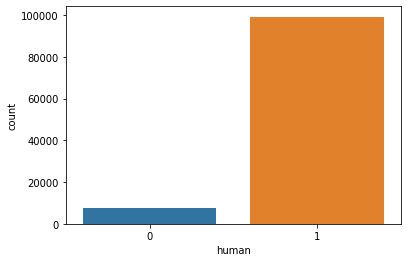

In [8]:
sns.countplot(x='human', data=df)

Use distplot to see the date_index distribution

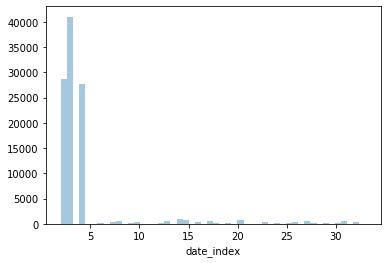

In [9]:
sns.distplot(df.date_index, kde=False)

Use countplot to see if there is any relation between track_id and human

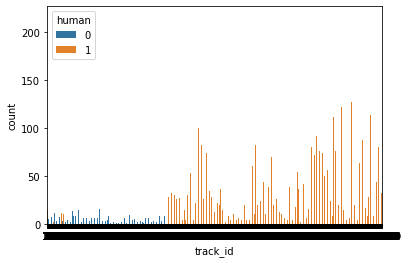

In [10]:
sns.countplot(x='track_id', hue='human', data=df)

Use countplot to see if there is any relation between geolocation_type and human

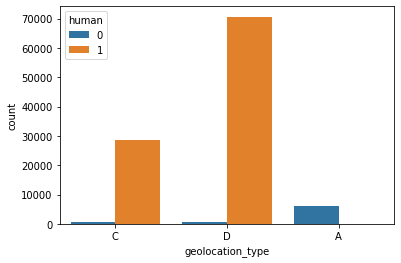

In [11]:
sns.countplot(x='geolocation_type', hue='human', data=df)

Use countplot to see if there is any relation between geolocation_id and human

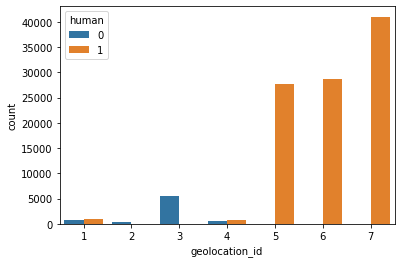

In [12]:
sns.countplot(x='geolocation_id', hue='human', data=df)

Use countplot to see if there is any relation between sensor_id and human

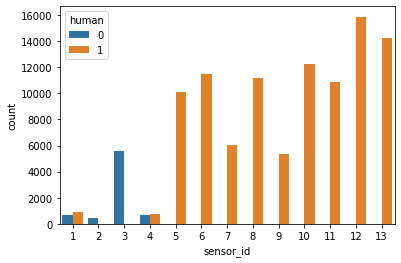

In [13]:
sns.countplot(x='sensor_id', hue='human', data=df)

Use countplot to see if there is any relation between snr_type and human

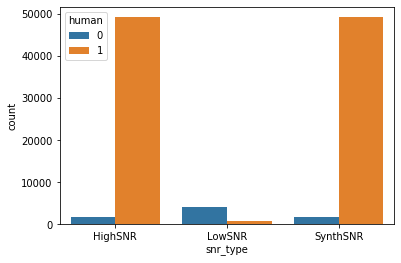

In [14]:
sns.countplot(x='snr_type', hue='human', data=df)

Use countplot to see if there is any relation between date_index and human

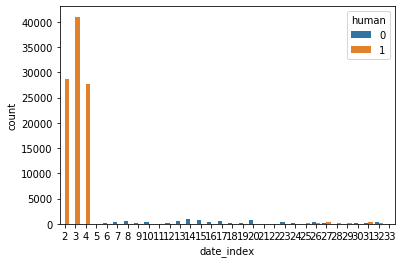

In [15]:
sns.countplot(x='date_index', hue='human', data=df)

build the model, split to train and test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df.head(2)

,segment_id,track_id,geolocation_type,geolocation_id,sensor_id,snr_type,date_index,human
0,0,11,C,1,1,HighSNR,27,0
1,1,16,C,1,1,HighSNR,27,0


In [18]:
cat_vars=['track_id','geolocation_type','geolocation_id','sensor_id','snr_type']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
cat_vars=['track_id','geolocation_type','geolocation_id','sensor_id','snr_type']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [19]:
data_final=df[to_keep]
data_final.columns.values

array(['segment_id', 'date_index', 'human', ..., 'snr_type_HighSNR',
       'snr_type_LowSNR', 'snr_type_SynthSNR'], dtype=object)

In [20]:
df2=data_final.copy()
df2.drop(['segment_id'],axis=1,inplace=True)

In [21]:
X = df2.loc[:, df2.columns != 'human']
y = df2.loc[:, df2.columns == 'human']
y=y.astype('int')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred = model.predict(X_test)

Create a classification report

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2495
           1       1.00      1.00      1.00     32687

    accuracy                           1.00     35182
   macro avg       1.00      1.00      1.00     35182
weighted avg       1.00      1.00      1.00     35182



In [28]:
#calculate Accuracy, how often is the classifier correct?
from sklearn import metrics
print("\nAccuracy of the logistic regession model:", "{:.2%}".format(metrics.accuracy_score(y_test, pred)))
print("Well, we got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, pred)))
#calculate Precision
print("\nPrecision of the logistic regession model:", "{:.2%}".format(metrics.precision_score(y_test, pred)))
print("Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic Regression model predicted a radar track is a human, that radar track is actually a human", "{:.2%}".format(metrics.precision_score(y_test, pred)) ,"of the time.")
#calculate Recall
print("\nRecall of the logistic regession model:", "{:.2%}".format(metrics.recall_score(y_test, pred)))
print("Recall: If there is a radar track of a human present in the test set, our Logistic Regression model can identify it", "{:.2%}".format(metrics.recall_score(y_test, pred)) ,"of the time.")


Accuracy of the logistic regession model: 99.90%
Well, we got a classification rate of 99.90%

Precision of the logistic regession model: 99.93%
Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic Regression model predicted a radar track is a human, that radar track is actually a human 99.93% of the time.

Recall of the logistic regession model: 99.97%
Recall: If there is a radar track of a human present in the test set, our Logistic Regression model can identify it 99.97% of the time.


Create a confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

[[ 2472    23]
 [   11 32676]]


In [31]:
print("The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions.")
print("The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions.")
print("We have a total predictions of: ",(confusion_matrix.sum()))

The result is telling us that we have:  35148 correct predictions.
The result is telling us that we have:  34 incorrect predictions.
We have a total predictions of:  35182


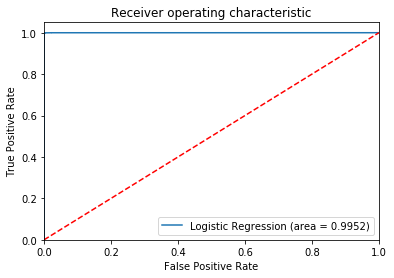

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()